In [1]:
from datetime import datetime, timezone, timedelta
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../sdpm_py_util')
import ocn_functions as ocnfuns
import plotting_functions as pltfuns
import atm_functions as atmfuns
import init_funs as initfuns
from get_PFM_info import get_PFM_info
from util_functions import s_coordinate_4
from util_functions import display_timing_info
import observation_functions as obsfuns

import pickle
import os
import pprint
import subprocess


/home/mspydell/models/PFM_root/PFM/driver/../sdpm_py_util/ocn_functions.py:27: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater


In [4]:
#atmfuns.get_atm_data_on_roms_grid('4')
#pltfuns.plot_all_fields_in_one('4')

atmfuns.atm_roms_dict_to_netcdf('4')


file_out is:
/scratch/PFM_Simulations/LV4_Forecast/Forc/LV4_ATM_FORCING.nc


In [2]:
ocnfuns.mk_LV2_BC_dict_edges('3')

PFM = get_PFM_info()
lv3_ocnBC_pckl = PFM['lv3_forc_dir'] + '/' + PFM['lv3_ocnBC_tmp_pckl_file']
lv3_bc_file_out =  PFM['lv3_forc_dir'] + '/' + PFM['lv3_bc_file']

ocnfuns.ocn_roms_BC_dict_to_netcdf_pckl(lv3_ocnBC_pckl,lv3_bc_file_out)


OCN_LV2_BC dict loaded with pickle
before entering LV4...
BC[ubar_south][0,0:5]
[-0.01541604 -0.01515334 -0.01489068 -0.01462802 -0.01436772]
BC[vbar_south][0,0:5]
[-0.00279605 -0.00270585 -0.00261566 -0.00253207 -0.00244849]
interpolating z with normal loops.
before exporting to pckl file
BC[ubar_south][0,0:5]
[-0.01541604 -0.01515334 -0.01489068 -0.01462802 -0.01436772]
BC[vbar_south][0,0:5]
[-0.00279605 -0.00270585 -0.00261566 -0.00253207 -0.00244849]
OCN_LV 3 _BC dict saved with pickle to:  /scratch/PFM_Simulations/LV3_Forecast/Forc/BC_LV3_tmp_file.pkl
OCN_BC dict loaded with pickle

max and min of data in ROMS BC file (iz is bottom [0] to top [39]):
max zeta_north =  0.871 m          at  ( it, ilon)     =  (  7,  68)
min zeta_north = -0.856 m          at  ( it, ilon)     =  ( 15, 227)
max zeta_south =  0.858 m          at  ( it, ilon)     =  (  6, 110)
min zeta_south = -0.847 m          at  ( it, ilon)     =  ( 15, 128)
max zeta_west  =  0.891 m          at  ( it, ilat)     =  (  

In [2]:

ocnfuns.mk_LV2_BC_dict_edges('4')

PFM = get_PFM_info()
lv4_ocnBC_pckl = PFM['lv4_forc_dir'] + '/' + PFM['lv4_ocnBC_tmp_pckl_file']
lv4_bc_file_out =  PFM['lv4_forc_dir'] + '/' + PFM['lv4_bc_file']

ocnfuns.ocn_roms_BC_dict_to_netcdf_pckl(lv4_ocnBC_pckl,lv4_bc_file_out)


OCN_LV3_BC dict loaded with pickle
interpolating z with normal loops.
OCN_LV 4 _BC dict saved with pickle to:  /scratch/PFM_Simulations/LV4_Forecast/Forc/BC_LV4_tmp_file.pkl
OCN_BC dict loaded with pickle

max and min of data in ROMS BC file (iz is bottom [0] to top [39]):
max zeta_north =  0.746 m          at  ( it, ilon)     =  ( 14,  28)
min zeta_north = -0.804 m          at  ( it, ilon)     =  ( 22,  28)
max zeta_south =  0.757 m          at  ( it, ilon)     =  ( 14, 380)
min zeta_south = -0.792 m          at  ( it, ilon)     =  ( 22, 360)
max zeta_west  =  0.751 m          at  ( it, ilat)     =  ( 14, 911)
min zeta_west  = -0.801 m          at  ( it, ilat)     =  ( 22,1134)
max ubar_north =  0.100 m/s        at  ( it, ilon)     =  ( 25,   2)
min ubar_north = -0.131 m/s        at  ( it, ilon)     =  ( 22,   0)
max ubar_south =  0.062 m/s        at  ( it, ilon)     =  ( 38, 484)
min ubar_south = -0.098 m/s        at  ( it, ilon)     =  ( 26, 484)
max ubar_west  =  0.097 m/s        a

In [2]:
ocnfuns.mk_LV2_IC_dict('4')

PFM = get_PFM_info()
lv4_ocnIC_pckl = PFM['lv4_forc_dir'] + '/' + PFM['lv4_ocnIC_tmp_pckl_file']
lv4_ic_file_out =  PFM['lv4_forc_dir'] + '/' + PFM['lv4_ini_file']

ocnfuns.ocn_roms_IC_dict_to_netcdf_pckl(lv4_ocnIC_pckl,lv4_ic_file_out)


LV_3_OCN_IC dict loaded with pickle
OCN_LV4_IC dict saved with pickle
OCN_IC dict loaded with pickle

max and min of data in ROMS IC file (iz is bottom [0] to top [39], note: it is always 0 b/c IC):
max zeta   = -0.326 m          at  ( it, ilat, ilon)     =  (  0,   0,  29)
min zeta   = -0.404 m          at  ( it, ilat, ilon)     =  (  0, 834, 373)
max ubar   =  0.039 m/s        at  ( it, ilat, ilon)     =  (  0, 935, 441)
min ubar   = -0.059 m/s        at  ( it, ilat, ilon)     =  (  0, 819, 477)
max vbar   =  0.067 m/s        at  ( it, ilat, ilon)     =  (  0, 989,   0)
min vbar   = -0.212 m/s        at  ( it, ilat, ilon)     =  (  0, 827, 413)
max u      =  0.055 m/s        at  ( it, iz, ilat, ilon) =  (  0,  4, 340,   0)
min u      = -0.102 m/s        at  ( it, iz, ilat, ilon) =  (  0,  0, 819, 477)
max v      =  0.100 m/s        at  ( it, iz, ilat, ilon) =  (  0,  0,1072,  52)
min v      = -0.369 m/s        at  ( it, iz, ilat, ilon) =  (  0,  0, 827, 413)
max temp   = 20.682 C    

In [8]:
ocnfuns.mk_LV2_IC_dict('3')

PFM = get_PFM_info()
lv3_ocnIC_pckl = PFM['lv3_forc_dir'] + '/' + PFM['lv3_ocnIC_tmp_pckl_file']
lv3_ic_file_out =  PFM['lv3_forc_dir'] + '/' + PFM['lv3_ini_file']

ocnfuns.ocn_roms_IC_dict_to_netcdf_pckl(lv3_ocnIC_pckl,lv3_ic_file_out)


LV_2_OCN_IC dict loaded with pickle
pre rotation IC values:
OCN_IC[vbar][0,0,0:5]:
[-0.00276483 -0.00267881 -0.00259279 -0.00250669 -0.00242059]
OCN_IC[ubar][0,0,0:5]:
[-0.01544785 -0.01518561 -0.01492341 -0.01466121 -0.01439901]
OCN_IC_0[v][0,-1,0,0:5]:
[0.06494426 0.06572682 0.06650937 0.06729274 0.06807611]
OCN_IC_0[u][0,-1,0,0:5]:
[-0.12942582 -0.12811154 -0.12679731 -0.1254831  -0.12416889]
pre saving, OCN_IC[ubar][0,0,0:5]
[-0.01544785 -0.01518561 -0.01492341 -0.01466121 -0.01439901]
pre saving, OCN_IC[vbar][0,0,0:5]
[-0.00276483 -0.00267881 -0.00259279 -0.00250669 -0.00242059]
OCN_LV3_IC dict saved with pickle
OCN_IC dict loaded with pickle

max and min of data in ROMS IC file (iz is bottom [0] to top [39], note: it is always 0 b/c IC):
max zeta   = -0.050 m          at  ( it, ilat, ilon)     =  (  0, 233,   0)
min zeta   = -0.155 m          at  ( it, ilat, ilon)     =  (  0,  80, 185)
max ubar   =  0.056 m/s        at  ( it, ilat, ilon)     =  (  0, 412,   0)
min ubar   = -0.06

PermissionError: [Errno 13] Permission denied: b'/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_IC.nc'

In [7]:
x=[0,1,2,3,4,5]
print(x)
y=x[::len(x)-1]
print(y)

[0, 1, 2, 3, 4, 5]
[0, 5]


In [2]:
ocnfuns.mk_LV2_BC_dict('4')

we are remaking the PFM.pkl file...
getting PFM info...
removing PFM info file...
we are not adding tidal forcing as Hycom includes tides.
PFM info was saved as /scratch/PFM_Simulations/PFM_run_info.pkl
OCN_LV3_BC dict loaded with pickle
interpolating z with normal loops.


Traceback (most recent call last):
  File "/home/mspydell/models/PFM_root/PFM/sdpm_py_util/ocn_functions.py", line 6211, in <module>
    globals()[args[1]](*args[2:])
  File "/home/mspydell/models/PFM_root/PFM/sdpm_py_util/ocn_functions.py", line 5312, in mk_LV2_BC_dict
    with open(fn_out,'wb') as fout:
              ^^^^^^
UnboundLocalError: cannot access local variable 'fn_out' where it is not associated with a value


In [5]:
#fn_bc3_old = '/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_BC_orig.nc'
fn_bc3_0 = '/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_BC_orig.nc'
fn_bc3_e = '/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_BC.nc'
fn_ic3 = '/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_IC.nc'

bcl3 = netCDF4.Dataset(fn_bc3_0)
bcl3e = netCDF4.Dataset(fn_bc3_e)
icl3 = netCDF4.Dataset(fn_ic3)

vn = 'vbar'
print(vn,'[0,0,0:5]')
print(bcl3[vn+'_south'][0,0:5])
print(bcl3e[vn+'_south'][0,0:5])
print(icl3[vn][0,0,0:5])

vn = 'ubar'
print(vn,'[0,0,0:5]')
print(bcl3[vn+'_south'][0,0:5])
print(bcl3e[vn+'_south'][0,0:5])
print(icl3[vn][0,0,0:5])


vn = 'v'
print(vn,'[0,0,0:5]')
print(bcl3[vn+'_south'][0,-1,0:5])
print(bcl3e[vn+'_south'][0,-1,0:5])
print(icl3[vn][0,-1,0,0:5])



vbar [0,0,0:5]
[-0.00279605 -0.00270585 -0.00261566 -0.00253207 -0.00244849]
[-0.00279605 -0.00270585 -0.00261566 -0.00253207 -0.00244849]
[-0.00276483 -0.00267881 -0.00259279 -0.00250669 -0.00242059]
ubar [0,0,0:5]
[-0.01541604 -0.01515334 -0.01489068 -0.01462802 -0.01436772]
[-0.01541604 -0.01515334 -0.01489068 -0.01462802 -0.01436772]
[-0.01544785 -0.01518561 -0.01492341 -0.01466121 -0.01439901]
v [0,0,0:5]
[0.06494485 0.06572662 0.06650928 0.06729274 0.06807612]
[0.06494485 0.06572662 0.06650928 0.06729274 0.06807612]
[0.06494485 0.06572662 0.06650928 0.06729274 0.06807612]


In [4]:
fn_bc3_e = '/scratch/PFM_Simulations/LV4_Forecast/Forc/LV4_OCEAN_BC.nc'
fn_ic3 = '/scratch/PFM_Simulations/LV4_Forecast/Forc/LV4_OCEAN_IC.nc'

bcl3e = netCDF4.Dataset(fn_bc3_e)
icl3 = netCDF4.Dataset(fn_ic3)

print('LV4 stuff')
vn = 'vbar'
print(vn,'[0,0,0:5]')
#print(bcl3[vn+'_south'][0,0:5])
print(bcl3e[vn+'_south'][0,0:5])
print(icl3[vn][0,0,0:5])

vn = 'ubar'
print(vn,'[0,0,0:5]')
#print(bcl3[vn+'_south'][0,0:5])
print(bcl3e[vn+'_south'][0,0:5])
print(icl3[vn][0,0,0:5])

vn = 'v'
print(vn,'[0,0,0:5]')
print(bcl3e[vn+'_south'][0,-1,0:5])
print(icl3[vn][0,-1,0,0:5])

vn = 'u'
print(vn,'[0,0,0:5]')
print(bcl3e[vn+'_south'][0,-1,0:5])
print(icl3[vn][0,-1,0,0:5])




LV4 stuff
vbar [0,0,0:5]
[0.03288884 0.03247119 0.032032   0.03160669 0.03118376]
[0.03591232 0.03592119 0.03592761 0.03593151 0.03591407]
ubar [0,0,0:5]
[0.00268438 0.00276717 0.00285277 0.0029161  0.00297683]
[0.00920922 0.0090708  0.00893536 0.00880244 0.00866775]
v [0,0,0:5]
[0.00595238 0.00577957 0.00559854 0.00543265 0.00525975]
[0.00595238 0.00577957 0.00559854 0.00543265 0.00525975]
u [0,0,0:5]
[-0.02786762 -0.02781877 -0.02776394 -0.02770433 -0.02763846]
[-0.02786763 -0.02781878 -0.02776395 -0.02770433 -0.02763847]


In [7]:
#fn_bc3_old = '/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_BC_orig.nc'

fn_hs3 = '/scratch/PFM_Simulations/LV3_Forecast/His/LV3_ocean_his_202410220600.nc'
hsl3 = netCDF4.Dataset(fn_hs3)
fn_ic3 = '/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_IC.nc'
icl3 = netCDF4.Dataset(fn_ic3)
fn_bc3 = '/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_BC.nc'
bcl3 = netCDF4.Dataset(fn_bc3)

for vn in ['zeta','ubar','vbar']:
    print(vn, ' his - IC [0,0,0:5]')
    print(hsl3[vn][0,0,0:5]-icl3[vn][0,0,0:5])

for vn in ['temp','salt','u','v']:
    print(vn, ' His - IC [0,-1,0,0:5]')
    print(hsl3[vn][0,-1,0,0:5]-icl3[vn][0,-1,0,0:5])

for vn in ['zeta','ubar','vbar']:
    print(vn, ' BC - IC [0,0,0:5]')
    print(bcl3[vn+'_south'][0,0:5]-icl3[vn][0,0,0:5])

for vn in ['temp','salt','u','v']:
    print(vn, ' BC - IC [0,-1,0,0:5]')
    print(bcl3[vn+'_south'][0,-1,0:5]-icl3[vn][0,-1,0,0:5])


zeta  his - IC [0,0,0:5]
[-1.24596522e-09 -5.08793646e-09 -9.13454640e-09  8.97034536e-09
  3.93520000e-09]
ubar  his - IC [0,0,0:5]
[ 1.54469876e-10 -3.83066159e-10 -2.20537292e-10  3.07357391e-10
  4.04251237e-10]
vbar  his - IC [0,0,0:5]
[ 1.70455617e-10  1.26729826e-10  2.08301387e-10 -4.01978052e-10
 -8.87067374e-10]
temp  His - IC [0,-1,0,0:5]
[-8.17169419e-03  5.23745694e-07 -1.63819628e-07 -5.11124878e-07
  4.96028438e-07]
salt  His - IC [0,-1,0,0:5]
[-1.22770293e-03 -1.74097941e-07 -9.88441087e-07 -1.68894032e-06
  1.27671952e-06]
u  His - IC [0,-1,0,0:5]
[-6.86314872e-04  2.24123137e-09  5.88365229e-09  6.71410177e-10
 -7.10889042e-09]
v  His - IC [0,-1,0,0:5]
[-1.13181811e-03  2.83100817e-10 -3.61594341e-10 -5.83243048e-10
  3.25523698e-10]
zeta  BC - IC [0,0,0:5]
[-9.97727950e-09 -9.48198081e-09 -8.98666963e-09 -9.69384090e-09
 -1.04011453e-08]
ubar  BC - IC [0,0,0:5]
[-5.19993027e-08 -1.09019910e-05 -2.17529924e-05 -3.26031221e-05
  5.89344792e-06]
vbar  BC - IC [0,0,0:5]


In [3]:
fn_ic4 = '/scratch/PFM_Simulations/LV4_Forecast/Forc/LV4_OCEAN_IC.nc'
icl4 = netCDF4.Dataset(fn_ic4)
fn_bc4 = '/scratch/PFM_Simulations/LV4_Forecast/Forc/LV4_OCEAN_BC.nc'
bcl4 = netCDF4.Dataset(fn_bc4)
#fn_gr4 = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV4_mss_oct2024.nc'
fn_gr4 = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV4_ROTATE_rx020_hplus020_DK_4river_otaymk.nc'
grl4 = netCDF4.Dataset(fn_gr4)


hb = grl4['h'][:]
hu = 0.5 * ( hb[:,0:-1]+hb[:,1:] )
hv = 0.5 * ( hb[0:-1,:]+hb[1:,:] )

zeta = np.squeeze( icl4['zeta'][0,:,:] )
zetau = 0.5 * ( zeta[:,0:-1]+zeta[:,1:] )
zetav = 0.5 * ( zeta[0:-1,:]+zeta[1:,:] )


zrom_u = s_coordinate_4(hu, 3.0 , 4.5 , 3.5 , 10, hraw=None, zeta=zetau)
zrom_v = s_coordinate_4(hv, 3.0 , 4.5 , 3.5 , 10, hraw=None, zeta=zetav)
    
zu=np.squeeze(zrom_u.z_r[0,:,:,:])    
zv=np.squeeze(zrom_v.z_r[0,:,:,:])

for aa in np.arange(5):
    ubar2 = ocnfuns.get_depth_avg_v(icl4['u'][0,:,0,aa],zu[:,0,aa],zetau[0,aa],hu[0,aa])
    print(aa, ' x index')
    print('IC ubar: ', icl4['ubar'][0,0,aa])
    print('ubar from IC u: ', ubar2)
    print('BC ubar: ', bcl4['ubar_south'][0,aa])
    print('\n')

for aa in np.arange(5):
    vbar2 = ocnfuns.get_depth_avg_v(icl4['v'][0,:,0,aa],zv[:,0,aa],zetav[0,aa],hv[0,aa])
    print(aa, ' x index')
    print('IC vbar: ', icl4['vbar'][0,0,aa])
    print('vbar from IC v: ', vbar2)
    print('BC vbar: ', bcl4['vbar_south'][0,aa])
    print('\n')



0  x index
IC ubar:  -0.008354259155436208
ubar from IC u:  -0.008354304699444724
BC ubar:  -0.00835425498715934


1  x index
IC ubar:  -0.007945288483351048
ubar from IC u:  -0.007945307080130326
BC ubar:  -0.007945286547238225


2  x index
IC ubar:  -0.007550516313222132
ubar from IC u:  -0.007550554101133891
BC ubar:  -0.007550515828594168


3  x index
IC ubar:  -0.007199147884832355
ubar from IC u:  -0.0071991595160739745
BC ubar:  -0.0071991477036254395


4  x index
IC ubar:  -0.006849018275139384
ubar from IC u:  -0.006849044462950889
BC ubar:  -0.006849017436144958


0  x index
IC vbar:  -0.02353098117780133
vbar from IC v:  -0.02353098117780133
BC vbar:  -0.023530981130791807


1  x index
IC vbar:  -0.022568452508666036
vbar from IC v:  -0.0225684538311522
BC vbar:  -0.022568452450449052


2  x index
IC vbar:  -0.021892857857908232
vbar from IC v:  -0.021892857961494448
BC vbar:  -0.021892857853774424


3  x index
IC vbar:  -0.02083104913259384
vbar from IC v:  -0.0208310493957

In [ ]:

fn_gr3 = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV3_rx020.nc'
fn_ic4 = '/scratch/matt/sdtjre_L4/IC_LV4_2016121100_tide_DK_4river_Nz10.nc'
fn_clm4 = '/scratch/matt/sdtjre_L4/ocean_clm_20180101_DK_4river_Nz10.nc'
fn_bc4 = '/scratch/matt/sdtjre_L4/BC_LV4_20161207_20170804_Nz10_dye.nc'

fn_ic3 = '/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_IC.nc'

fn_bc4_new = '/scratch/PFM_Simulations/LV4_Forecast/Forc/LV4_OCEAN_BC.nc'
fn_ic4_new = '/scratch/PFM_Simulations/LV4_Forecast/Forc/LV4_OCEAN_IC.nc'
fn_ic4_new_m1 = '/scratch/PFM_Simulations/LV4_Forecast/Forc/LV4_OCEAN_IC_m1.nc'


fn_nud4 = '/scratch/matt/sdtjre_L4/ocean_nudcoef_DK_4river_10day_Nz10.nc'
fn_tr4 = '/scratch/matt/sdtjre_L4/river_tracer_4river_NADB2017_0.nc'

fn_gr4 = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV4_ROTATE_rx020_hplus020_DK_4river_otaymk.nc'
fn_gr4_new = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV4_mss_oct2024.nc'


#bcl3_old = netCDF4.Dataset(fn_bc3_old)
bcl3 = netCDF4.Dataset(fn_bc3)
icl3 = netCDF4.Dataset(fn_ic3)
bcl4 = netCDF4.Dataset(fn_bc4_new)
icl4 = netCDF4.Dataset(fn_ic4_new)
#icl4m1 = netCDF4.Dataset(fn_ic4_new_m1)
gr4  = netCDF4.Dataset(fn_gr4)
gr4_new  = netCDF4.Dataset(fn_gr4_new)



print('level 3')
print('bars')
print(icl3['vbar'][0,0,0:5])
print(bcl3['vbar_south'][0,0:5])
#print(bcl3_old['vbar_south'][0,0:5])
print(icl3['vbar'][0,-1,0:5])
print(bcl3['vbar_north'][0,0:5])
#print(bcl3_old['vbar_north'][0,0:5])
print(icl3['ubar'][0,0,0:5])
print(bcl3['ubar_south'][0,0:5])
#print(bcl3_old['ubar_south'][0,0:5])
print(icl3['ubar'][0,-1,0:5])
print(bcl3['ubar_north'][0,0:5])
#print(bcl3_old['ubar_north'][0,0:5])
print('top u,v')
print(icl3['v'][0,-1,0,0:5])
print(bcl3['v_south'][0,-1,0:5])
print(icl3['v'][0,-1,-1,0:5])
print(bcl3['v_north'][0,-1,0:5])
print(icl3['u'][0,-1,0,0:5])
print(bcl3['u_south'][0,-1,0:5])
print(icl3['u'][0,-1,-1,0:5])
print(bcl3['u_north'][0,-1,0:5])


print('level 4')
print('bars')
print(icl4['vbar'][0,0,0:5])
#print(icl4m1['vbar'][0,0,0:5])
print(bcl4['vbar_south'][0,0:5])
print(icl4['vbar'][0,-1,0:5])
print(bcl4['vbar_north'][0,0:5])
print(icl4['ubar'][0,0,0:5])
print(bcl4['ubar_south'][0,0:5])
print(icl4['ubar'][0,-1,0:5])
print(bcl4['ubar_north'][0,0:5])
print(icl4['ubar'][0,0:5,0])
print(bcl4['ubar_west'][0,0:5])
print('top u,v')
print(icl4['v'][0,-1,0,0:5])
#print(icl4m1['v'][0,-1,0,0:5])
print(bcl4['v_south'][0,-1,0:5])
print(icl4['v'][0,-1,-1,0:5])
print(bcl4['v_north'][0,-1,0:5])
print(icl4['u'][0,-1,0,0:5])
print(bcl4['u_south'][0,-1,0:5])
print(icl4['u'][0,-1,-1,0:5])
print(bcl4['u_north'][0,-1,0:5])
print(icl4['u'][0,-1,0:5,0])
print(bcl4['u_west'][0,-1,0:5])

#print(gr4_new['depthmin'][:])
#print(gr4_new['depthmax'][:])
#ocnfuns.ncdisp(fn_gr4_new)

#pprint.pp(bcl3.variables.keys())
#pprint.pp(bcl4.variables.keys())

#print(gr4['angle'][-4:,0:4])
#print(gr4.variables.keys())
#print(gr4['dndx'][-4:,0:4])
#print(gr4['dmde'][-4:,0:4])


In [4]:
a = 5
print(a)
b = a
print(b)
b = 6
print(b)
print(a)

5
5
6
5


In [ ]:
dum = 's'
if isinstance(dum,str):
    print('string')

In [ ]:




gr4_dict = ocnfuns.netcdf_to_dict(fn_gr4)
print(gr4_dict['JPRJ']['data'])
print(gr4_dict['spherical']['data'])
el = gr4['el'][:]
print(el)
print(type(el))
print(el.data)
print(gr4_dict.keys())
print(gr4_dict['xl']['data'][:])
print()

#dy = gr4['y_rho'][-1,:] -gr4['y_rho'][0,:]
#dx = gr4['x_rho'][:,-1] -gr4['x_rho'][:,0]
#print( np.max(gr4['y_rho'][:])-np.min(gr4['y_rho'][:]) )
#print( np.max(gr4['x_rho'][:])-np.min(gr4['x_rho'][:]) )

#gr4d_new = ocnfuns.LV4grid_to_new()
#ocnfuns.LV4grid_to_new_dotnc(fn_gr4_new)
#ocnfuns.dict_to_netcdf(gr4d_new, fn_gr4_new)

gr4_new = netCDF4.Dataset(fn_gr4_new)
print(gr4)
print(gr4_new)
print(gr4.variables.keys())
print(gr4_new.variables.keys())


Text(0.5, 1.0, 'LV grid')

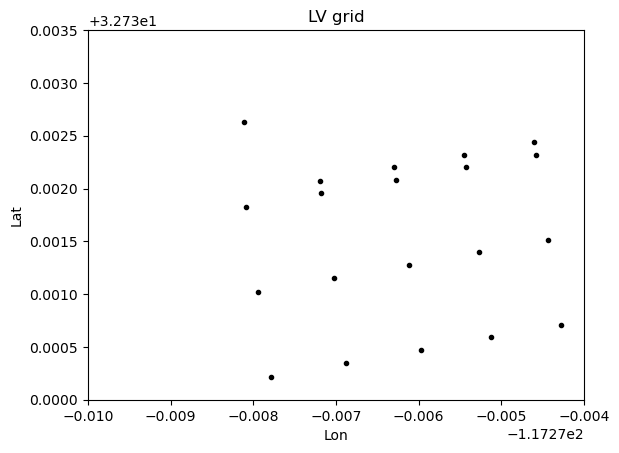

In [21]:
fig, ax = plt.subplots()
p1=ax.plot(gr4['lon_rho'][:],gr4['lat_rho'][:],'k.')
plt.xlim([-117.28,-117.274])
plt.ylim([32.73,32.7335])
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.title('LV grid')


Text(0.5, 1.0, 'LV grid new')

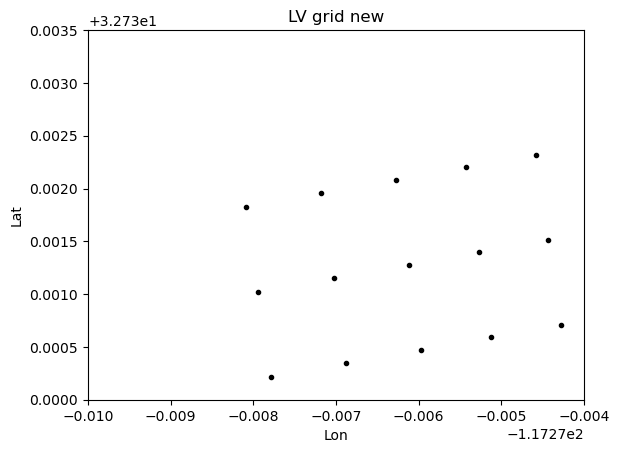

In [4]:
fig, ax = plt.subplots()
p1=ax.plot(gr4_new['lon_rho'][:],gr4_new['lat_rho'][:],'k.')
plt.xlim([-117.28,-117.274])
plt.ylim([32.73,32.7335])
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.title('LV grid new')

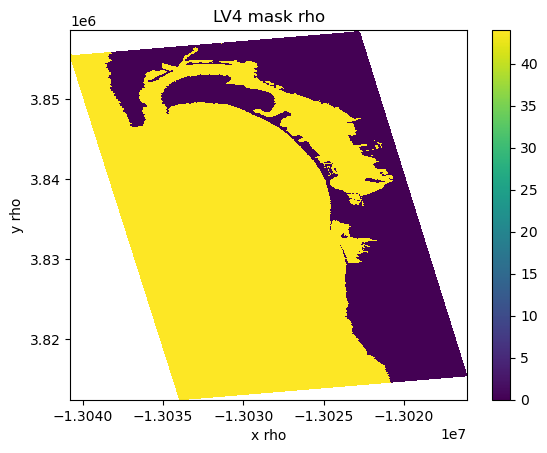

In [12]:
fig, ax = plt.subplots()
#p0=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],vmin=0,vmax=44)
p1=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['mask_rho'][:])

#p0=ax.contourf(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],15)
#p1=ax.plot(gr4['x_rho'][:],gr4['y_rho'][:],'r.')
#plt.xlim([-1.304085e7,-1.30401e7])
#plt.ylim([3.85519e6,3.8557e6])
plt.xlabel('x rho')
plt.ylabel('y rho')
plt.title('LV4 mask rho')
fig.colorbar(p0,ax=ax)
#plt.clim(20,24)


NameError: name 'p0' is not defined

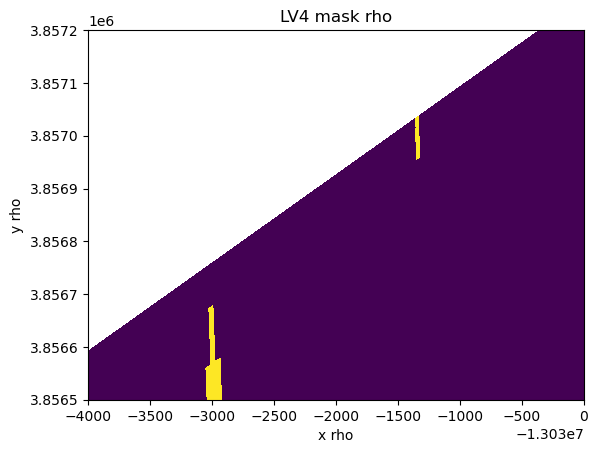

In [5]:
fig, ax = plt.subplots()
#p0=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],vmin=0,vmax=44)
p1=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['mask_rho'][:])

#p0=ax.contourf(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],15)
#p1=ax.plot(gr4['x_rho'][:],gr4['y_rho'][:],'r.')
plt.xlim([-1.3034e7,-1.303e7])
plt.ylim([3.8565e6,3.8572e6])
plt.xlabel('x rho')
plt.ylabel('y rho')
plt.title('LV4 mask rho')
fig.colorbar(p1,ax=ax)
#plt.clim(20,24)


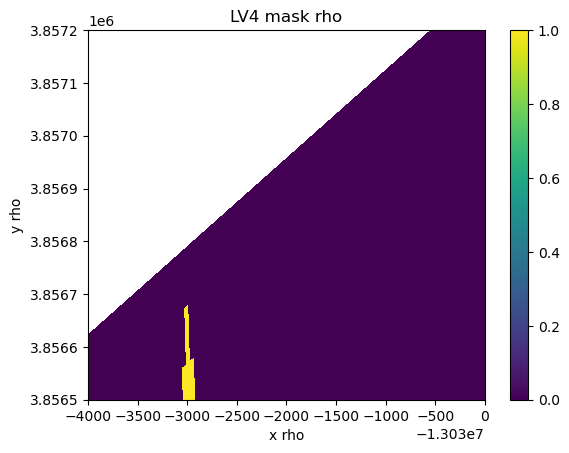

In [6]:
fig, ax = plt.subplots()
#p0=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],vmin=0,vmax=44)
p1=ax.pcolor(gr4_new['x_rho'][:],gr4_new['y_rho'][:],gr4_new['mask_rho'][:])

#p0=ax.contourf(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],15)
#p1=ax.plot(gr4['x_rho'][:],gr4['y_rho'][:],'r.')
plt.xlim([-1.3034e7,-1.303e7])
plt.ylim([3.8565e6,3.8572e6])
plt.xlabel('x rho')
plt.ylabel('y rho')
plt.title('LV4 mask rho')
fig.colorbar(p1,ax=ax)
#plt.clim(20,24)


In [9]:
print(np.shape(gr4['mask_rho']))
print('indices: [-4:,120:170]')
print('mask rho')
print(gr4['mask_rho'][-4:,120:170])
print('mask u')
print(gr4['mask_u'][-4:,120:170])
print('mask v')
print(gr4['mask_v'][-4:,120:170])
print('mask psi')
print(gr4['mask_psi'][-4:,120:170])

print('indices: [-4:,168]')
print('mask rho')
print(gr4['mask_rho'][-4:,168])
print('mask u')
print(gr4['mask_u'][-4:,168])
print('mask v')
print(gr4['mask_v'][-4:,168])
print('mask psi')
print(gr4['mask_psi'][-4:,168])

print('indices: [-2:-1,:]')
print('mask rho')
print(gr4['mask_rho'][-2:-1,:])
print('mask u')
print(gr4['mask_u'][-2:-1,:])
print('mask v')
print(gr4['mask_v'][-2:-1,:])
print('mask psi')
print(gr4['mask_psi'][-2:-1,:])

print('indices: [-2:-1,168]')
print('mask rho')
print(gr4['mask_rho'][-2:-1,168])

dy = gr4['y_rho'][1:,:] -gr4['y_rho'][0:-1,:]

print('indices: [-4:,0:4]')
print('angle')
print(gr4['angle'][-4:,0:4])
print('dmde')
print(gr4['dmde'][-4:,0:4])
print('pn')
print(gr4['pn'][-4:,0:4])
print('1/pn')
print(1/gr4['pn'][-4:,0:4])
print('dy')
print(dy[-4:,0:4])

(1142, 486)
indices: [-4:,120:170]
mask rho
[[0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]]
mask u
[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0

In [ ]:

fig, ax = plt.subplots()
p0=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],vmin=0,vmax=44)
p1=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['mask_rho'][:])

#p0=ax.contourf(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],15)
#p1=ax.plot(gr4['x_rho'][:],gr4['y_rho'][:],'r.')
plt.xlim([-1.3041e7,-1.302e7])
plt.ylim([3.855e6,3.859e6])
plt.xlabel('x rho')
plt.ylabel('y rho')
plt.title('LV4 mask rho')
fig.colorbar(p0,ax=ax)
#plt.clim(20,24)

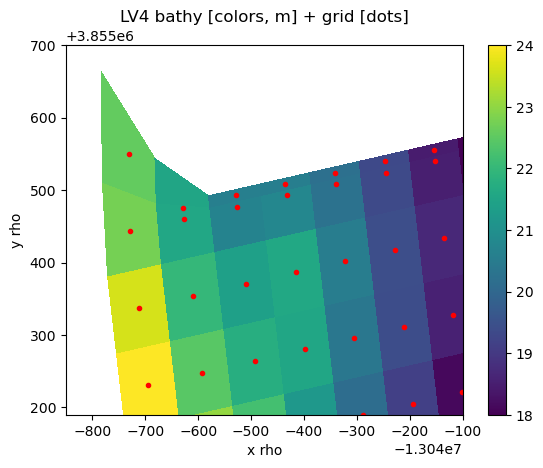

In [7]:


fig, ax = plt.subplots()
p0=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],vmin=18,vmax=24)
#p0=ax.contourf(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],15)
p1=ax.plot(gr4['x_rho'][:],gr4['y_rho'][:],'r.')
plt.xlim([-1.304085e7,-1.30401e7])
plt.ylim([3.85519e6,3.8557e6])
plt.xlabel('x rho')
plt.ylabel('y rho')
plt.title('LV4 bathy [colors, m] + grid [dots]')
fig.colorbar(p0,ax=ax)
#plt.clim(20,24)


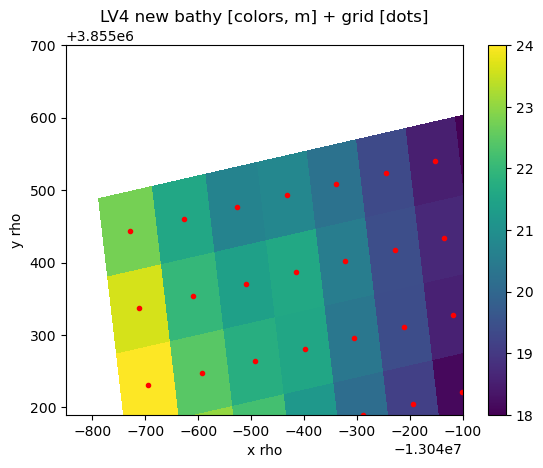

In [8]:


fig, ax = plt.subplots()
p0=ax.pcolor(gr4_new['x_rho'][:],gr4_new['y_rho'][:],gr4_new['h'][:],vmin=18,vmax=24)
#p0=ax.contourf(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],15)
p1=ax.plot(gr4_new['x_rho'][:],gr4_new['y_rho'][:],'r.')
plt.xlim([-1.304085e7,-1.30401e7])
plt.ylim([3.85519e6,3.8557e6])
plt.xlabel('x rho')
plt.ylabel('y rho')
plt.title('LV4 new bathy [colors, m] + grid [dots]')
fig.colorbar(p0,ax=ax)
#plt.clim(20,24)

In [ ]:
fig, ax = plt.subplots()

p1=ax.plot(gr4['x_rho'][:],gr4['y_rho'][:],'k.')
plt.xlim([-1.3041e7,-1.304e7])
plt.ylim([3.8553e6,3.8557e6])
plt.xlabel('x rho')
plt.ylabel('y rho')
plt.title('LV grid')

In [38]:
dx = gr4['x_rho'][:,1:] -gr4['x_rho'][:,0:-1]
dy = gr4['y_rho'][:,1:] -gr4['y_rho'][:,0:-1]
ang_c = 180 / np.pi * np.arctan(dy/dx)

print(ang_c[-3:,0:4])
print(180/np.pi*gr4['angle'][-3:,0:4])
print(gr4['h'][-3:,0:4])

[[9.484445704594458 9.484459056734934 9.484471899984356 9.484484298425746]
 [9.484448218116068 9.484461569873336 9.48447441388806 9.484486811503542]
 [-36.06761271083998 9.48446193672926 9.484474781493287 9.484487180155917]]
[[  9.48445238   9.48445238   9.48446548   9.4844781 ]
 [  9.48445489   9.48445489   9.48446799   9.48448061]
 [-15.81722384 -15.81722384   9.48446836   9.48448098]]
[[23.62285325 21.99881981 21.37725271 21.59235871]
 [22.74928274 21.57262081 20.67244786 20.78255374]
 [22.56900786 21.5193133  20.56380396 20.54438318]]


In [8]:
print(bcl4['ubar_south'][0,0:10])
print(bcl4['vbar_south'][0,0:10])
print(bcl4['u_south'][0,0,0:10])
print(bcl4['v_south'][0,0,0:10])
print(bcl3['u_south'][0,0,0:10])
print(bcl3['v_south'][0,0,0:10])


[-0.00749322 -0.00761675 -0.00774055 -0.00783121 -0.0079039  -0.00794792
 -0.00787619 -0.00778383 -0.0077286  -0.00769358]
[0.08994491 0.08907894 0.08817176 0.08728798 0.08638031 0.0853406
 0.08428121 0.08317497 0.08202091 0.08087804]
[-35.91038518 -37.33289013 -38.80770408 -40.23511939 -41.62519999
 -42.94523233 -43.87134299 -44.90172504 -45.82759539 -46.64888041]
[-35.04563641 -36.62050289 -37.85964106 -39.62487054 -40.67862118
 -42.43731821 -43.37490468 -44.31754221 -45.34929879 -46.17231592]
[0.03142638 0.03119439 0.0309624  0.03073041 0.03049843 0.03026644
 0.03003448 0.02980252 0.02957056 0.02933859]
[-0.00341608 -0.00333372 -0.00325137 -0.00316898 -0.00308659 -0.00300419
 -0.00282081 -0.00263742 -0.00245403 -0.00227064]


In [ ]:



gr3 = netCDF4.Dataset(fn_gr3)
gr4 = netCDF4.Dataset(fn_gr4)

fig, ax = plt.subplots()
p1=ax.plot(gr3['lon_rho'][:],gr3['lat_rho'][:],'k.')
p1=ax.plot(gr4['lon_rho'][:],gr4['lat_rho'][:],'r.')


In [31]:
t_dye = bcl4['dye_time'][:]
d1_n = bcl4['dye_south_02'][:]


print(t_dye)
print(d1_n[:,1:10,1:10])


[6550.5 6790.5]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [88]:
clm4 = netCDF4.Dataset(fn_clm4)
pprint.pp(clm4.variables.keys())

d1 = clm4['dye_01'][:]
td1 = clm4['dye_time'][:]
print(td1)
print(clm4['temp_time'][:])
print(clm4['salt_time'][:])
print(np.shape(d1))

print(d1[0,-1,0,:])
print(clm4['salt'][1,-1,300,:])
print(clm4['temp'][1,-1,300,:])
print(clm4['Vtransform'][:])
print(clm4['Vstretching'][:])
print(clm4['theta_s'][:])
print(clm4['theta_b'][:])
print(clm4['Tcline'][:])
print(clm4['hc'][:])


dict_keys(['spherical', 'Vtransform', 'Vstretching', 'theta_s', 'theta_b', 'Tcline', 'hc', 'Cs_r', 'sc_r', 'Cs_w', 'sc_w', 'temp_time', 'salt_time', 'temp', 'salt', 'dye_time', 'dye_01', 'dye_02'])
[6544.5 6940.5]
[6544.5 6940.5]
[6544.5 6940.5]
(2, 10, 1142, 486)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0

In [46]:
nud4 = netCDF4.Dataset(fn_nud4)
pprint.pp(nud4.variables.keys())
print(np.shape(nud4['temp_NudgeCoef'][:]))
print(nud4['temp_NudgeCoef'][0,500,:])
print(nud4['salt_NudgeCoef'][0,500,:])
print(nud4['tracer_NudgeCoef'][0,500,:])

dict_keys(['spherical', 'lat_rho', 'lon_rho', 'temp_NudgeCoef', 'salt_NudgeCoef', 'tracer_NudgeCoef'])
(10, 1142, 486)
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -

In [48]:
ic4 = netCDF4.Dataset(fn_ic4)
pprint.pp(ic4.variables.keys())


dict_keys(['spherical', 'Vtransform', 'Vstretching', 'theta_s', 'theta_b', 'Tcline', 'hc', 'Cs_r', 'sc_r', 'Cs_w', 'sc_w', 'ocean_time', 'salt', 'temp', 'u', 'ubar', 'v', 'vbar', 'zeta', 'sand_01', 'sandfrac_01', 'sandmass_01', 'bed_thickness', 'bed_age', 'bed_porosity', 'bed_biodiff', 'grain_diameter', 'grain_density', 'settling_vel', 'erosion_stress', 'ripple_length', 'ripple_height', 'dmix_offset', 'dmix_slope', 'dmix_time'])


dict_keys(['theta_s', 'theta_b', 'Tcline', 'hc', 'Cs_r', 'sc_r', 'Cs_w', 'sc_w', 'river', 'river_time', 'river_Xposition', 'river_Eposition', 'river_direction', 'river_Vshape', 'river_transport', 'river_flag', 'river_temp', 'river_salt', 'river_dye_01', 'river_dye_02'])
(9,)
[1.0 -- -- -- -- -- -- -- --]
(9457,)
(9,)
[433. 433. 433. 433. 433. 337. 464. 464. 439.]
[614. 615. 613. 616. 612.  76. 961. 962. 779.]
(9,)
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(10, 9)
(9457, 9)
(9,)
[3. 3. 3. 3. 3. 3. 3. 3. 3.]
(9457, 10, 9)
[0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
[[0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0

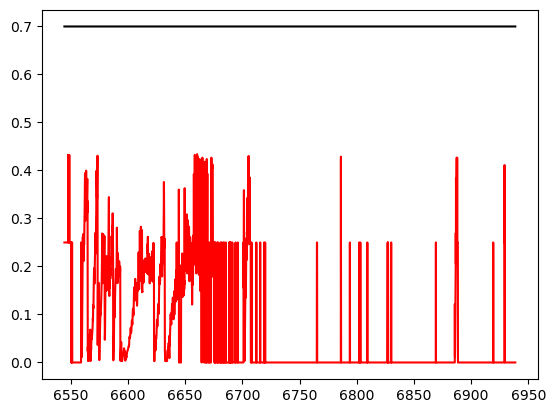

In [87]:
tr4 = netCDF4.Dataset(fn_tr4)
gr4 = netCDF4.Dataset(fn_gr4)
pprint.pp(tr4.variables.keys())
print(np.shape(tr4['river'][:]))
print(tr4['river'][:])
print(np.shape(tr4['river_time'][:]))
print(np.shape(tr4['river_Xposition'][:]))
print(tr4['river_Xposition'][:])
print(tr4['river_Eposition'][:])
print(np.shape(tr4['river_direction'][:]))
print(tr4['river_direction'][:])
print(np.shape(tr4['river_Vshape'][:]))
#print(tr4['river_Vshape'][:])
print(np.shape(tr4['river_transport'][:]))
print(np.shape(tr4['river_flag'][:]))
print(tr4['river_flag'][:])
print(np.shape(tr4['river_temp'][:]))
print(tr4['river_dye_01'][-1,:,5])
print(tr4['river_dye_02'][0,:,:])

fig, ax = plt.subplots()
p1=ax.plot(tr4['river_time'][:],tr4['river_dye_01'][:,0,5],'k')
p1=ax.plot(tr4['river_time'][:],tr4['river_dye_02'][:,0,0],'r')


In [ ]:

fig, ax = plt.subplots()
p0=ax.imshow(gr4['mask_rho'], interpolation='none',origin='lower')
p1=ax.plot(tr4['river_Xposition'][:],tr4['river_Eposition'][:],'ro')



In [ ]:

fig, ax = plt.subplots()
p0=ax.imshow(d1_n[1,:,:], interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax,location='right')
plt.axis('auto')


end_date in the future, getting data up to 2024-10-22 12:58:20
end_date in the future, getting data up to 2024-10-22 12:58:20
end_date in the future, getting data up to 2024-10-22 12:51:00
end_date in the future, getting data up to 2024-10-22 12:51:00
end_date in the future, getting data up to 2024-10-22 12:51:00
end_date in the future, getting data up to 2024-10-22 12:28:20
end_date in the future, getting data up to 2024-10-22 12:28:20
end_date in the future, getting data up to 2024-10-22 12:21:00
end_date in the future, getting data up to 2024-10-22 12:21:00
end_date in the future, getting data up to 2024-10-22 12:21:00
end_date in the future, getting data up to 2024-10-22 12:28:20
end_date in the future, getting data up to 2024-10-22 12:28:20
end_date in the future, getting data up to 2024-10-22 12:21:00
end_date in the future, getting data up to 2024-10-22 12:21:00
end_date in the future, getting data up to 2024-10-22 12:21:00
end_date in the future, getting data up to 2024-10-22 1

Text(0.5, 1.0, 'some nearshore CDIP buoy Temps')

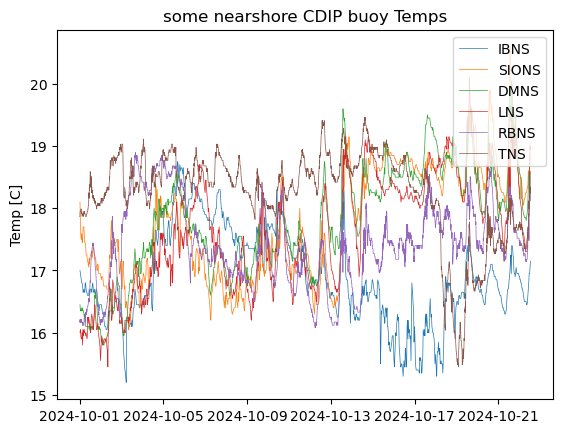

In [5]:
#Usage: function takes in start_date, end_date, location_code, and variables you want to grab
#start_date and end_date both take date strings in the form 'yyyymmdd'
#location_code: 3 digit location code of buoy
#variables: list of variables in strings that you want
#example: 
buoy_dict = dict()
buoy_dict['IBNS'] = '155'
#buoy_dict['MBW'] = '220'
buoy_dict['SIONS'] = '201'
#buoy_dict['TPI'] = '101'
#buoy_dict['TPO'] = '100'
buoy_dict['DMNS'] = '153'
buoy_dict['LNS'] = '262'
#buoy_dict['OSOS'] = '045'
#buoy_dict['SNI'] = '067'
buoy_dict['RBNS'] = '264'
#buoy_dict['GBOS'] = '271'
#buoy_dict['SPS'] = '213'
#buoy_dict['SP'] = '092'
#buoy_dict['LBC'] = '215'
#buoy_dict['SCB'] = '203'
#buoy_dict['SMB'] = '028'
buoy_dict['TNS'] = '103'

cdip = dict()
fig, ax = plt.subplots()
cnt=0

for buoy in buoy_dict.keys():
    cdip[buoy] = obsfuns.get_cdip_buoy_data('20241001', '20241023', buoy_dict[buoy], ['sstTime', 'sstSeaSurfaceTemperature', 'gpsTime', 'gpsLatitude', 'gpsLongitude','waveTime','waveHs'])
    p1=ax.plot(cdip[buoy]['sstTime'][:],cdip[buoy]['sstSeaSurfaceTemperature'][:],'-',linewidth=0.5,label=buoy)
    cnt += cnt

ax.legend()


plt.ylabel('Temp [C]')
plt.title('some nearshore CDIP buoy Temps')
#cdip1 = obsfuns.get_cdip_buoy_data('20241001', '20241023', '201', ['sstTime', 'sstSeaSurfaceTemperature', 'gpsTime', 'gpsLatitude', 'gpsLongitude'])
#cdip2 = obsfuns.get_cdip_buoy_data('20241001', '20241023', '155', ['sstTime', 'sstSeaSurfaceTemperature', 'gpsTime', 'gpsLatitude', 'gpsLongitude'])


#print(cdip.keys()) 
#print(cdip['gpsLatitude'])  
#print(cdip['gpsLongitude'])  

#p2=ax.plot(cdip2['sstTime'][:],cdip2['sstSeaSurfaceTemperature'][:],'r-',linewidth=0.5)